In [ ]:
!pip install mediapipe

In [ ]:
# Importing Libraries
import cv2
import mediapipe as mp
import numpy as np
import os
from matplotlib import pyplot as plt

# Used to convert protobuf message
# to a dictionary.
from google.protobuf.json_format import MessageToDict
from google.colab.patches import cv2_imshow


In [ ]:
# Define parameters here!
image_path = "/content/drive/MyDrive/hand_images/10_screenagers.jpg"

min_detection_confid_param = 0.75
min_tracking_confid_param = 0.75

visualize_image_detection = True
visualize_preprocessed_image = True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def preprocess_and_visualize(img, visualize_preprocessed_image):
    """
    Preprocess the image and show the effects of each preprocessing step.
    """
    if visualize_preprocessed_image:
      # Original Image
      plt.figure(figsize=(20, 10))
      plt.subplot(1, 4, 1)
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.title("Original Image")
      plt.axis('off')

      # Gaussian Blur
      blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
      plt.subplot(1, 4, 2)
      plt.imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
      plt.title("Gaussian Blur")
      plt.axis('off')

      # Histogram Equalization (YCrCb)
      ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
      ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
      equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
      plt.subplot(1, 4, 3)
      plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
      plt.title("Histogram Equalization")
      plt.axis('off')

      # Combined Preprocessing
      preprocessed_img = cv2.GaussianBlur(equalized_img, (5, 5), 0)
      plt.subplot(1, 4, 4)
      plt.imshow(cv2.cvtColor(preprocessed_img, cv2.COLOR_BGR2RGB))
      plt.title("Combined Preprocessing")
      plt.axis('off')
    else:
      blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
      ycrcb_img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
      ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])
      equalized_img = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)
      preprocessed_img = cv2.GaussianBlur(equalized_img, (5, 5), 0)
    if visualize_preprocessed_image:
      plt.show()

    return preprocessed_img

def hand_detector(image_path,min_detection_confid_param,min_tracking_confid_param, visualize_image_detection, visualize_preprocessed_image):
    hands_found = 0

    # Initialize Mediapipe Hands Model
    mpHands = mp.solutions.hands
    hands = mpHands.Hands(
        static_image_mode=True,
        model_complexity=1,
        min_detection_confidence=min_detection_confid_param,
        min_tracking_confidence=min_tracking_confid_param,
        max_num_hands=50  # Mediapipe limit
    )

    # Read and preprocess the image
    img = cv2.imread(image_path)

    #if visualize_preprocessed_image:
    preprocessed_img = preprocess_and_visualize(img, visualize_preprocessed_image)

    # Convert preprocessed image to RGB for Mediapipe
    imgRGB = cv2.cvtColor(preprocessed_img, cv2.COLOR_BGR2RGB)

    # Process the image to detect hands
    results = hands.process(imgRGB)

    # Draw hand landmarks on the original image
    mp_drawing = mp.solutions.drawing_utils
    if results.multi_hand_landmarks:
        for handLMs in results.multi_hand_landmarks:
            hands_found += 1
            mp_drawing.draw_landmarks(img, handLMs, mpHands.HAND_CONNECTIONS)

    if visualize_image_detection:
      # Display the processed image with detected hands
      plt.figure(figsize=(10, 6))
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.axis('off')
      plt.title("Detected Hands")
      plt.show()

    return hands_found




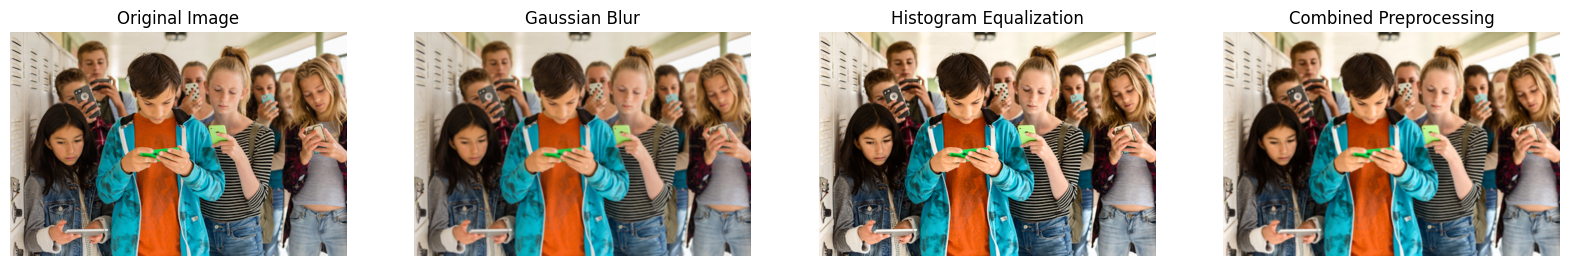

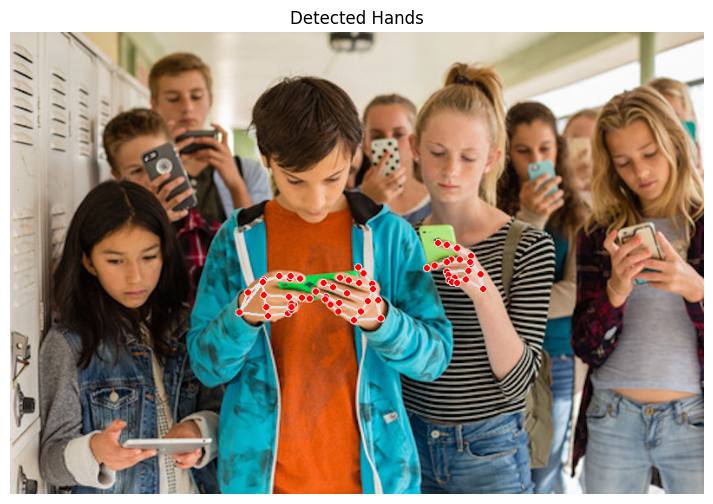

3

In [ ]:
# Test the function
hand_detector(image_path, min_detection_confid_param, min_tracking_confid_param, visualize_image_detection, visualize_preprocessed_image)


# 1.&nbsp;Create Test Items

In [ ]:
def create_test_items():

  def folder_to_string_list(folder_path):

    """

    Takes a folder path and returns a list of strings representing each item within the folder.

    """

    items = os.listdir(folder_path)

    string_list = [str(item) for item in items]

    return string_list

  test_items = []

  test_folder = folder_to_string_list("/content/drive/MyDrive/hand_images")
  for line in test_folder:
    line_split = line.split('_')

    number_of_hands = line_split[0]

    test_items.append([str(line),number_of_hands])
  return test_items

test_items = create_test_items()
print(test_items)

[['10_screenagers.jpg', '10'], ['5_peeples.jpg', '5'], ['1_imps.jpg', '1'], ['3_wave.jpg', '3'], ['3_people.jpg', '3'], ['5_peoples.jpg', '5'], ['5_folk.jpg', '5'], ['3_peoples.jpg', '3'], ['5_premium.jpg', '5'], ['3_folk.jpg', '3'], ['6_pexels.jpg', '6'], ['8_istockphoto.jpg', '8'], ['5_jury.jpg', '5'], ['5_diversityhire.jpg', '5'], ['13_chalkboard.jpg', '13']]


Grid Based Hyperparameter Optimization

In [ ]:

def get_hyperarameter_array(start, end, n):
    return np.linspace(start, end, n)

Vectorized Hyperparameter arrays into turple array

In [ ]:
def arrs_to_turple(arr1: np.ndarray, arr2 : np.ndarray):
  x, y = np.meshgrid(arr1, arr2)
  return np.array(list(zip(x.ravel(), y.ravel())))

In [ ]:
arr1 = get_hyperarameter_array(0.5,0.75,2)
arr2 = get_hyperarameter_array(0.25,0.5,2)
hyperparameter_array = arrs_to_turple(arr1,arr2)
print(arr1, arr2)
print(hyperparameter_array)

[0.5  0.75] [0.25 0.5 ]
[[0.5  0.25]
 [0.75 0.25]
 [0.5  0.5 ]
 [0.75 0.5 ]]


Get Accuracies for each hyperparameter combination

In [ ]:
def get_all_validation_errors(imgs: np.ndarray, hyperparameter_arr: np.ndarray) -> np.ndarray:

    imgs_path = "/content/drive/MyDrive/hand_images/"
    errors = np.zeros(hyperparameter_arr.shape[0])
    accuracy_storage = {i: [] for i in range(len(hyperparameter_arr))}

    for n in range(hyperparameter_arr.shape[0]):
        errorsPerHP = np.zeros(len(imgs))

        for i in range(len(imgs)):
            img_path = imgs_path + imgs[i][0]
            try:
                modelFit = hand_detector(img_path, hyperparameter_arr[n][0], hyperparameter_arr[n][1], False, False)
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
                modelFit = 0

            ground_truth = int(imgs[i][1])
            error = ground_truth - modelFit
            errorsPerHP[i] = error


            accuracy = 1 - abs(error) / max(ground_truth, 1)
            accuracy_storage[n].append(accuracy)

        errors[n] = np.linalg.norm(errorsPerHP, 2)

    return errors, accuracy_storage


In [ ]:
def get_best_validation_error(errors, hyperparameter_arr):
  minIndex = np.argmin(errors)
  return hyperparameter_arr[minIndex]

In [ ]:
def validation_test_split(arr, splitPercent):
  return arr[0: int(len(arr) * splitPercent)], arr[int(len(arr) * splitPercent) + 1 : len(arr)]


In [ ]:
imgs = create_test_items()
validation_imgs , test_imgs = validation_test_split(imgs, 0.5)
print(validation_imgs, test_imgs)
errors  = get_all_validation_errors(validation_imgs, hyperparameter_array)[0]
best_hyperparam = get_best_validation_error(errors, hyperparameter_array)
print(errors)
print(best_hyperparam)

[['10_screenagers.jpg', '10'], ['5_peeples.jpg', '5'], ['1_imps.jpg', '1'], ['3_wave.jpg', '3'], ['3_people.jpg', '3'], ['5_peoples.jpg', '5'], ['5_folk.jpg', '5']] [['5_premium.jpg', '5'], ['3_folk.jpg', '3'], ['6_pexels.jpg', '6'], ['8_istockphoto.jpg', '8'], ['5_jury.jpg', '5'], ['5_diversityhire.jpg', '5'], ['13_chalkboard.jpg', '13']]
[ 6.92820323 10.29563014  6.92820323 10.29563014]
[0.5  0.25]


# 2.&nbsp;Visualize outputs

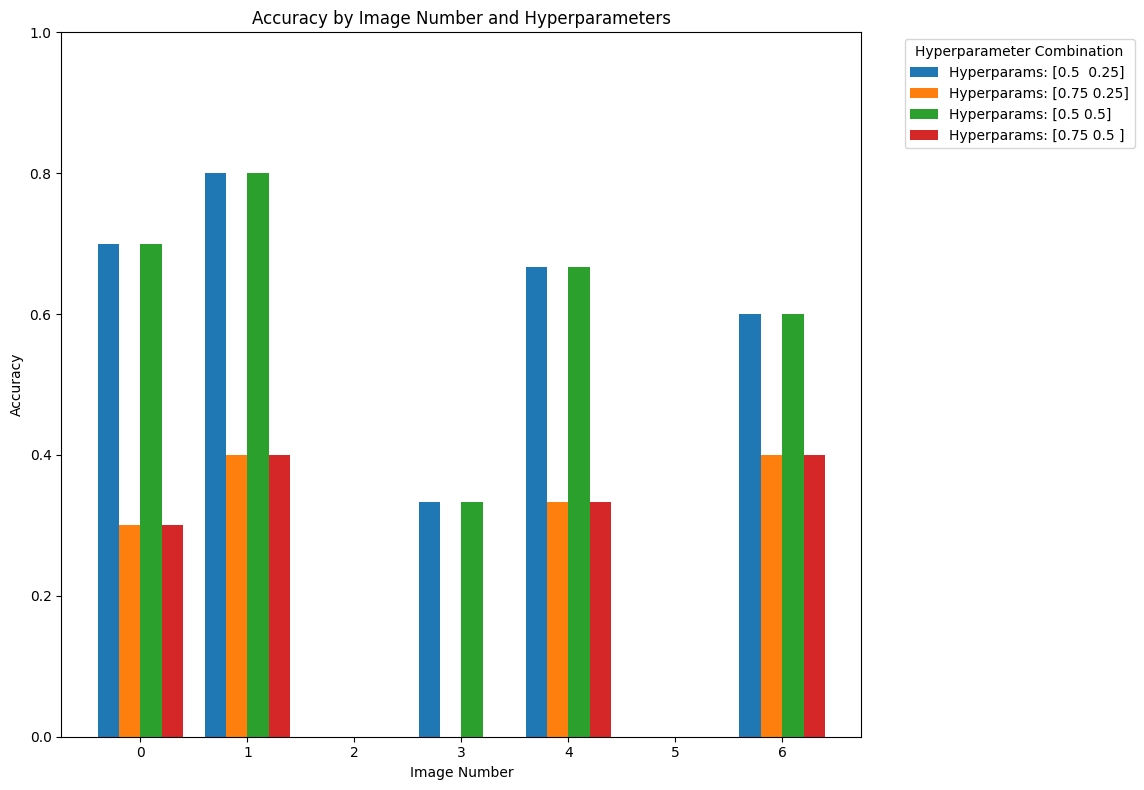

In [ ]:
def plot_combined_hyperparameter_histogram(hyperparameter_arr, accuracy_storage):
    """
    Plot accuracy for each hyperparameter combination on the same graph.
    X-axis: Image number.
    Y-axis: Accuracy.
    """
    plt.figure(figsize=(12, 8))

    num_hyperparams = len(hyperparameter_arr)
    bar_width = 0.2
    indices = np.arange(len(next(iter(accuracy_storage.values()))))

    for i in range(num_hyperparams):

        offset = i * bar_width
        plt.bar(
            indices + offset,
            accuracy_storage[i],
            width=bar_width,
            label=f"Hyperparams: {hyperparameter_arr[i]}"
        )


    plt.title("Accuracy by Image Number and Hyperparameters")
    plt.xlabel("Image Number")
    plt.ylabel("Accuracy")
    plt.xticks(indices + (bar_width * (num_hyperparams - 1)) / 2, indices)
    plt.ylim(0, 1)
    plt.legend(title="Hyperparameter Combination", loc="upper right", bbox_to_anchor=(1.35, 1))
    plt.tight_layout()

    plt.show()


errors, accuracy_storage = get_all_validation_errors(validation_imgs, hyperparameter_array)

plot_combined_hyperparameter_histogram(hyperparameter_array, accuracy_storage)

In [ ]:
def plot_error_distribution(errors, hyperparameter_arr):
    plt.figure(figsize=(10, 6))
    plt.hist(errors, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Error Distribution Across Hyperparameters")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.show()

#plot_error_distribution(errors, hyperparameter_array)

In [ ]:
def get_test_values(imgs, bestHyperParam):
    imgs_path = "/content/drive/MyDrive/hand_images/"
    fit_values = np.zeros(len(imgs))
    true_values = np.zeros(len(imgs))
    for i in range(len(imgs)):
        img_path = imgs_path + imgs[i][0]
        try:
            modelFit = hand_detector(img_path, bestHyperParam[0], bestHyperParam[1], False, False)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            modelFit = 0
        fit_values[i] = modelFit
        true_values[i] = imgs[i][1]

    return fit_values, true_values

In [ ]:
def plot_test_values(fit_values, true_values):
    numBars = fit_values.shape[0]
    x_vals = np.arange(numBars)
    width = 0.25

    plt.xticks(x_vals)
    plt.bar(x_vals + width/2, fit_values, width = width, color='red', edgecolor='black', alpha=0.7, label = "Predicted Values")
    plt.bar(x_vals - width/2, true_values, width = width, color='blue', edgecolor='black', alpha=0.7, label = "True values")
    plt.title("Test Distribution across with best found hyperparameters")
    plt.xlabel("Image Number")
    plt.ylabel("Amount of Hands")
    plt.tight_layout()
    plt.legend()
    plt.show()


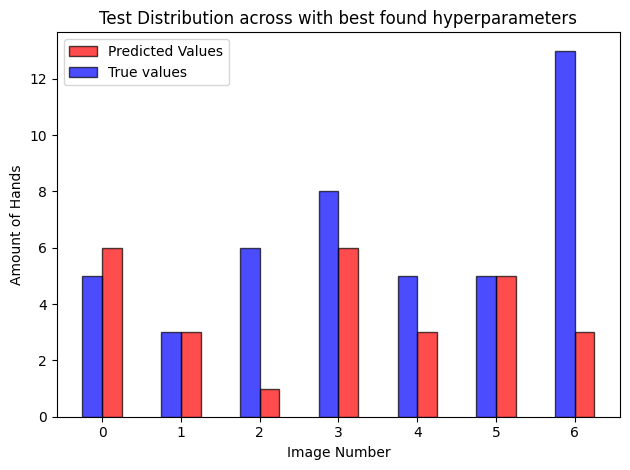

In [ ]:
fit_values, true_values = get_test_values(test_imgs, best_hyperparam)
plot_test_values(fit_values,true_values)

In [ ]:
def get_test_error(fit_values, true_values):
  return np.sqrt(np.linalg.norm(fit_values - true_values, 2))
def get_test_accuracy(error, true_values):
  return 1 - abs(error) / np.max(true_values)
test_error = get_test_error(fit_values, true_values)
test_accuracy = get_test_accuracy(test_error, true_values)
print(test_error)
print(test_accuracy)

3.402328159186034
0.7382824492933819
